In [49]:
# import packages
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
import sklearn
import os
import glob
from datetime import date

## Read input

### ABUD. Family aggr. Part filtr.

In [3]:
# read ABUD part data
bgi = pd.read_excel('results/aggregation/abud/Family_BGI_merged_output_part.xlsx')
ill = pd.read_excel('results/aggregation/abud/Family_Illumina_merged_output_part.xlsx')

In [4]:
# define samples names
col_names = bgi.columns[1:]
samples = [name[4:] for name in col_names]

nm = 'bgi_'+str(samples[1])
nm

'bgi_VNIDA4'

In [32]:
only_bgi_name = print(','.join(map(str, only_bgi_gr[agg_level].values)))

Akkermansiaceae,Desulfovibrionaceae,Ruminococcaceae


In [34]:
only_bgi_name = ','.join(map(str, only_bgi_gr[agg_level].values))
only_bgi_name

'Akkermansiaceae,Desulfovibrionaceae,Ruminococcaceae'

In [35]:
# aggrregation level
agg_level = 'family'

# define samples names
col_names = bgi.columns[1:]
samples = [name[4:] for name in col_names]

# new df with columns: name, bgi_sample_number, ill_sample_nember, correlation
df = pd.DataFrame(columns=['name', 'bgi_sample_number', 'ill_sample_number', 
                           'abud_corr','common','only_bgi','only_ill', 'only_bgi_names', 'only_ill_names'])

for smpl in samples:

    # if smpl present in both datasets
    col_name1 = 'ill_' + str(smpl)
    if col_name1 in ill.columns:

        col_name2 = 'bgi_' + str(smpl)
        if col_name2 in bgi.columns:
            
            #print(smpl)
            #read info about sample
            smplB = bgi[[agg_level, 'bgi_' + str(smpl)]].dropna()
            smplB = smplB[smplB['bgi_' + str(smpl)] > 0]  
            smplI = ill[[agg_level,'ill_' + str(smpl)]].dropna()
            smplI = smplI[smplI['ill_' + str(smpl)] > 0]

            mrg = pd.merge(smplB, smplI, on=agg_level, how='outer')
            #print(mrg['bgi_' + str(smpl)].corr(mrg['ill_' + str(smpl)]))
            #print('BGI nmb:' + str(len(smplB)) + ' Illumina nmb:' + str(len(smplI)))
            common_values = len(list(set(smplB[agg_level]).intersection(set(smplI[agg_level]))))
            only_bgi_gr = smplB.loc[~smplB[agg_level].isin(smplI[agg_level])]
            only_ill_gr = smplI.loc[~smplI[agg_level].isin(smplB[agg_level])]
            only_bgi_numb = len(only_bgi_gr)
            only_ill_numb = len(only_ill_gr)
            only_bgi_name = ','.join(map(str, only_bgi_gr[agg_level].values))
            only_ill_name = ','.join(map(str, only_ill_gr[agg_level].values))

            # assign values to df
            df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI), 
                            'abud_corr': mrg['bgi_' + str(smpl)].corr(mrg['ill_' + str(smpl)]),
                            'common': common_values,'only_bgi': only_bgi_numb,'only_ill': only_ill_numb,
                            'only_bgi_names': only_bgi_name, 'only_ill_names': only_ill_name}, 
                            ignore_index=True)

df = df.sort_values(by=['common'], ascending=False)
df.to_excel('results/KrakenRes_abud_famAggr_part.xlsx', index=False)
df.head()

/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_53350/1120320552.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_53350/1120320552.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_53350/1120320552.py:40: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df = df.append({'name': smpl, 'bgi_sample_number': len(smplB), 'ill_sample_number': len(smplI),
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel

,name,bgi_sample_number,ill_sample_number,abud_corr,common,only_bgi,only_ill,only_bgi_names,only_ill_names
122,VMB23G,15,15,0.999253,15,0,0,,
1192,V8M1K2,16,16,0.999368,15,1,1,UBA11471,CAG-313
1627,V1M14M,16,15,0.999823,15,1,0,Gastranaerophilaceae,
1393,VJR62K,16,17,0.994144,15,1,2,UBA660,"CAG-312,UBA1829"
1439,V6SZC7,15,15,0.999972,15,0,0,,


## RAD

In [50]:
df.head()

,name,bgi_sample_number,ill_sample_number,abud_corr,common,only_bgi,only_ill,only_bgi_names,only_ill_names
122,VMB23G,15,15,0.999253,15,0,0,,
1192,V8M1K2,16,16,0.999368,15,1,1,UBA11471,CAG-313
1627,V1M14M,16,15,0.999823,15,1,0,Gastranaerophilaceae,
1393,VJR62K,16,17,0.994144,15,1,2,UBA660,"CAG-312,UBA1829"
1439,V6SZC7,15,15,0.999972,15,0,0,,


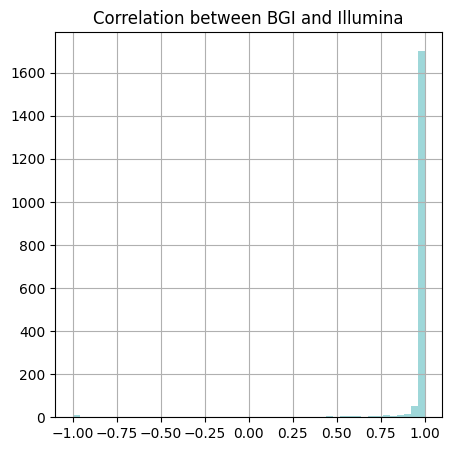

In [36]:
df['abud_corr'].hist(bins=50, figsize=(5,5), color='#75c7c9', alpha=0.7)
plt.title('Correlation between BGI and Illumina')

#plt.text(-1,-100, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
#plt.text(-1,-120, 'Data: '+str(date.today()), color='grey', fontsize=5)

plt.savefig('results/Correlation_hist_abud_famAggr_part.png', dpi=300, bbox_inches='tight')

In [39]:
s1 = sum((df['bgi_sample_number'] > df['ill_sample_number']))
s2 = sum((df['ill_sample_number'] > df['bgi_sample_number']))

print(s1, s2)


528 528


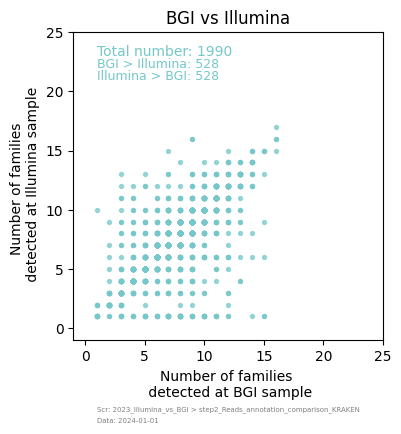

In [47]:
plt.figure(figsize=(4,4))
plt.scatter(df['bgi_sample_number'], df['ill_sample_number'], color='#75c7c9', alpha=0.7, s=8)
plt.xlabel('Number of families \n detected at BGI sample')
plt.ylabel('Number of families \n detected at Illumina sample')
plt.xlim(-1, 25)
plt.ylim(-1, 25)
plt.title('BGI vs Illumina')
plt.text(1,23, 'Total number: '+str(len(df)), color='#75c7c9')
plt.text(1,22, 'BGI > Illumina: '+str(sum((df['bgi_sample_number'] > df['ill_sample_number']))), fontsize=9, color='#75c7c9')
plt.text(1,21, 'Illumina > BGI: '+str(sum((df['ill_sample_number'] > df['bgi_sample_number']))), fontsize=9, color='#75c7c9')

plt.text(1,-7, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(1,-8, 'Data: '+str(date.today()), color='grey', fontsize=5)

plt.savefig('results/FamalyNumber_comp_abud_famAggr_part.png', dpi=300, bbox_inches='tight')

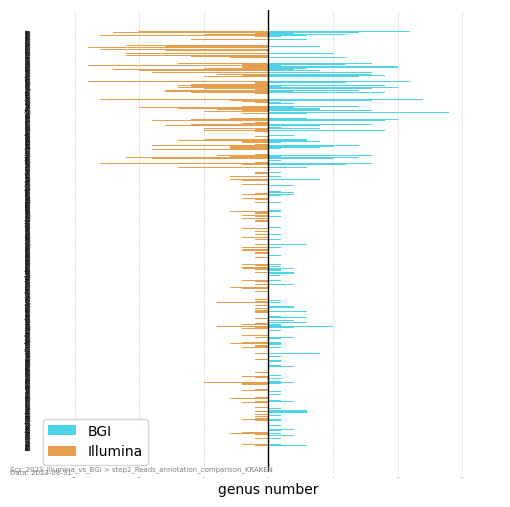

In [13]:
# Set the figure size
plt.figure(figsize=(6, 6))

# Plot the positive values as blue bars
plt.barh(df['name'], df['only_bgi_genus'], color='#4ed4e6', label='BGI')
plt.barh(df['name'], df['only_ill_genus']*-1, color='#e69f4e', label='Illumina')

# Set the x-axis limit to accommodate both positive and negative values
plt.xlim(-max(max(df['only_bgi_genus']), abs(min(df['only_ill_genus']))) - 2,
         max(max(df['only_bgi_genus']), abs(min(df['only_ill_genus']))) + 2)

# Add a vertical line at 0 to separate positive and negative values
plt.axvline(x=0, color='black', linewidth=1)

# Add labels and a title
plt.xlabel('genus number')
#plt.title('Bidirectional Bar Chart')
plt.legend()
plt.tick_params(axis='both', which='both', length=0, labelsize=0)
plt.box(False)
plt.grid(axis='x', linestyle='dotted', linewidth=0.5)

plt.text(-20,-100, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-20,-120, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch1.png')
plt.savefig('results/Genus_bar_ch1.svg')


/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_8345/3286832855.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['only_bgi_genus'], shade=True, color='y')
/var/folders/5j/pvj6k02n3mn9ztpn77vjtfzw0000gn/T/ipykernel_8345/3286832855.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['only_ill_genus'], shade=True, color='g', alpha=0.1)


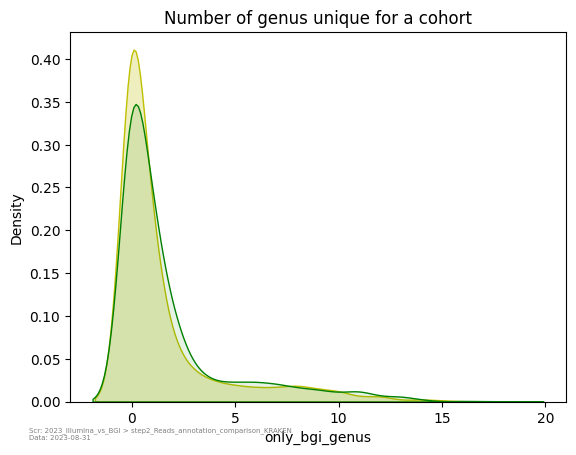

In [19]:
sns.kdeplot(df['only_bgi_genus'], shade=True, color='y')
sns.kdeplot(df['only_ill_genus'], shade=True, color='g', alpha=0.1)

plt.title('Number of genus unique for a cohort')

plt.text(-5,-0.035, 'Scr: 2023_Illumina_vs_BGI > step2_Reads_annotation_comparison_KRAKEN', color='grey', fontsize=5)
plt.text(-5,-0.045, 'Data: '+str(date.today()), color='grey', fontsize=5)

# Show the plot
plt.savefig('results/Genus_bar_ch2.png')
plt.savefig('results/Genus_bar_ch2.svg')